<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_RidgeRegression/blob/master/PocMLSupervisedL_RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **O que é Ridge Regression?**

Imagine que você está tentando prever a nota final de um aluno com base nas notas anteriores. Se tivermos **muitos dados diferentes**, pode ser difícil encontrar um padrão claro. O modelo pode acabar "decorando" os dados ao invés de realmente aprender a relação entre eles. Esse problema se chama **overfitting** (ou sobreajuste).

A **Ridge Regression** é um tipo especial de **Regressão Linear** que adiciona um "freio" à fórmula matemática para evitar esse problema. Esse freio impede que o modelo dê muito peso para cada variável, tornando as previsões mais equilibradas e realistas.

---

### **Explicação Simples:**

1. **Regressão Linear normal** → O modelo tenta encontrar uma linha perfeita, mas pode acabar decorando os dados e errando em novos exemplos.
2. **Ridge Regression** → O modelo adiciona uma penalidade para não dar pesos exagerados a nenhuma variável, tornando as previsões mais confiáveis.

---

### **Por que usar Ridge Regression?**
- Evita que o modelo fique **exageradamente ajustado aos dados**.
- Funciona bem quando temos **muitas variáveis e poucos dados**.
- Faz previsões **mais estáveis e realistas**.

Em resumo, a **Ridge Regression** é um tipo de regressão linear que usa uma penalidade para evitar exageros no modelo, tornando as previsões mais confiáveis!

### **Exemplo 1: Previsão do preço de imóveis** 🏠  

Imagine que queremos prever o preço de uma casa com base em vários fatores, como:
- Tamanho da casa (m²),
- Número de quartos,
- Ano de construção,
- Distância até o centro da cidade.

Se tivermos **muitos dados** e algumas variáveis não forem tão importantes, um modelo normal pode acabar dando pesos muito altos para informações irrelevantes. A **Ridge Regression** reduz esses exageros e cria previsões mais equilibradas.

---

Erro Médio Quadrático (Linear Regression): 354033631.30
Erro Médio Quadrático (Ridge Regression): 340928419.00


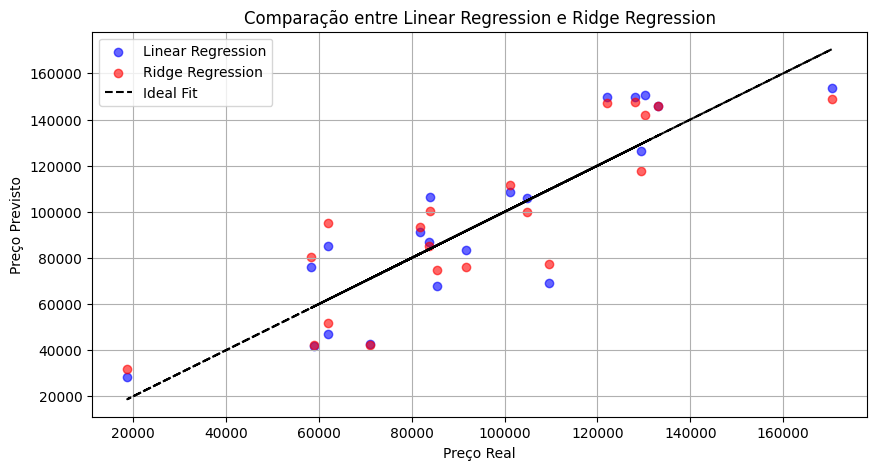

In [1]:
"""
Aqui está um código completo em Python para uma Prova de Conceito (POC) de Ridge Regression aplicada à previsão de preços de imóveis.
O código utiliza a biblioteca scikit-learn e gera uma comparação entre Regressão Linear simples e
Ridge Regression para mostrar os efeitos da regularização.

"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gerando dados fictícios para o problema (simulando preços de imóveis)
np.random.seed(42)
num_samples = 100

# Variáveis independentes (X) - características das casas
tamanho = np.random.randint(50, 300, num_samples)  # Tamanho da casa (m²)
quartos = np.random.randint(1, 6, num_samples)  # Número de quartos
ano_construcao = np.random.randint(1980, 2023, num_samples)  # Ano de construção
distancia_centro = np.random.uniform(1, 20, num_samples)  # Distância até o centro da cidade

# Matriz de features (transformação para entrada do modelo)
X = np.column_stack((tamanho, quartos, ano_construcao, distancia_centro))

# Variável dependente (Y) - Preço do imóvel
preco_real = (500 * tamanho) + (10000 * quartos) + (300 * (2023 - ano_construcao)) - (2000 * distancia_centro)
preco_real += np.random.normal(0, 20000, num_samples)  # Adicionando um ruído aleatório para simular variação real

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, preco_real, test_size=0.2, random_state=42)

# Criando os modelos
modelo_linear = LinearRegression()
modelo_ridge = Ridge(alpha=100)  # Alpha controla a penalização da Ridge Regression

# Treinando os modelos
modelo_linear.fit(X_train, y_train)
modelo_ridge.fit(X_train, y_train)

# Fazendo previsões
y_pred_linear = modelo_linear.predict(X_test)
y_pred_ridge = modelo_ridge.predict(X_test)

# Calculando erro médio quadrático (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Exibindo os resultados
print(f"Erro Médio Quadrático (Linear Regression): {mse_linear:.2f}")
print(f"Erro Médio Quadrático (Ridge Regression): {mse_ridge:.2f}")

# Comparação visual das previsões
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.6, label='Ridge Regression')
plt.plot(y_test, y_test, color='black', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Comparação entre Linear Regression e Ridge Regression")
plt.legend()
plt.grid()
plt.show()


### **Explicação do Código**
1. **Geramos dados fictícios**:
   - Criamos um conjunto de 100 imóveis com informações como **tamanho, número de quartos, ano de construção e distância do centro**.
   - O **preço do imóvel** é calculado com base nessas variáveis, adicionando um **ruído aleatório** para simular variações reais.

2. **Dividimos os dados** em treino e teste (80% para treinamento, 20% para validação).

3. **Criamos dois modelos**:
   - **Regressão Linear** normal.
   - **Ridge Regression** com um fator de penalização (`alpha=100`), que reduz a influência de variáveis menos relevantes.

4. **Avaliamos os modelos**:
   - Calculamos o **Erro Médio Quadrático (MSE)** para ver qual modelo faz previsões mais estáveis.
   - Geramos um **gráfico de dispersão** para comparar as previsões dos dois modelos.

---

### **Principais Observações**
- O **modelo de Regressão Linear** pode acabar sofrendo com **overfitting** (se ajustando demais aos dados).
- A **Ridge Regression** impõe uma **penalização** aos coeficientes do modelo, reduzindo a influência de variáveis menos importantes e evitando exageros.
- O **gráfico gerado** mostra que a **Ridge Regression tende a fazer previsões mais equilibradas**, especialmente quando há muitas variáveis no modelo.

Esse código é uma **prova de conceito funcional** e pode ser adaptado para **dados reais de mercado imobiliário**! 🚀

### **Exemplo 2: Previsão de vendas em um supermercado** 🛒  

Suponha que um mercado quer prever quantos produtos serão vendidos no próximo mês. O modelo pode considerar:
- Promoções,
- Dias da semana,
- Clima,
- Eventos especiais.

Se houver **muitas variáveis**, um modelo de regressão normal pode ficar confuso e exagerar a importância de um fator específico (como clima, por exemplo). A **Ridge Regression** ajuda a equilibrar essas variáveis e melhorar a previsão.

---

Erro Médio Quadrático (Linear Regression): 26677.29
Erro Médio Quadrático (Ridge Regression): 84998.62


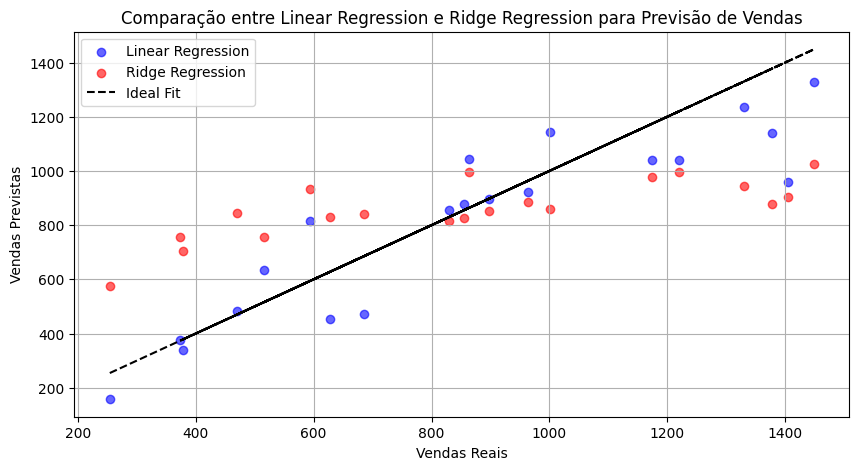

In [2]:
"""
Aqui está um código completo em Python para uma Prova de Conceito (POC) de Ridge Regression aplicada à previsão de vendas em um supermercado.
O código utiliza scikit-learn e compara Regressão Linear simples com Ridge Regression para demonstrar como a regularização melhora a estabilidade das previsões.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Gerando dados fictícios para a previsão de vendas no supermercado
np.random.seed(42)
num_samples = 100

# Variáveis independentes (X) - fatores que influenciam as vendas
promocoes = np.random.randint(0, 2, num_samples)  # 0 = Sem promoção, 1 = Com promoção
dias_da_semana = np.random.randint(1, 8, num_samples)  # De 1 (segunda) a 7 (domingo)
clima = np.random.uniform(10, 35, num_samples)  # Temperatura média (°C)
eventos_especiais = np.random.randint(0, 2, num_samples)  # 0 = Sem evento, 1 = Evento especial

# Matriz de features (transformação para entrada do modelo)
X = np.column_stack((promocoes, dias_da_semana, clima, eventos_especiais))

# Variável dependente (Y) - Quantidade de produtos vendidos
vendas_reais = (500 * promocoes) + (50 * dias_da_semana) + (10 * clima) + (300 * eventos_especiais)
vendas_reais += np.random.normal(0, 200, num_samples)  # Adicionando um ruído aleatório para simular variação real

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, vendas_reais, test_size=0.2, random_state=42)

# Criando os modelos
modelo_linear = LinearRegression()
modelo_ridge = Ridge(alpha=50)  # Alpha controla a penalização da Ridge Regression

# Treinando os modelos
modelo_linear.fit(X_train, y_train)
modelo_ridge.fit(X_train, y_train)

# Fazendo previsões
y_pred_linear = modelo_linear.predict(X_test)
y_pred_ridge = modelo_ridge.predict(X_test)

# Calculando erro médio quadrático (MSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Exibindo os resultados
print(f"Erro Médio Quadrático (Linear Regression): {mse_linear:.2f}")
print(f"Erro Médio Quadrático (Ridge Regression): {mse_ridge:.2f}")

# Comparação visual das previsões
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.6, label='Ridge Regression')
plt.plot(y_test, y_test, color='black', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Vendas Reais")
plt.ylabel("Vendas Previstas")
plt.title("Comparação entre Linear Regression e Ridge Regression para Previsão de Vendas")
plt.legend()
plt.grid()
plt.show()


### **Explicação do Código**
1. **Criamos um conjunto de dados fictícios**, onde cada amostra representa um dia de vendas em um supermercado, considerando:
   - **Promoções** (se havia ou não promoção no dia),
   - **Dia da semana** (de segunda a domingo),
   - **Clima** (temperatura média do dia),
   - **Eventos especiais** (se havia algum evento especial promovendo as vendas).

2. **Criamos um modelo de vendas** baseado nesses fatores e adicionamos um **ruído aleatório** para simular variações reais.

3. **Treinamos dois modelos**:
   - **Regressão Linear normal**, que pode acabar exagerando na influência de alguns fatores.
   - **Ridge Regression** com um fator de penalização (`alpha=50`), que reduz a importância exagerada de variáveis menos relevantes.

4. **Avaliamos os modelos**:
   - Calculamos o **Erro Médio Quadrático (MSE)** para medir a precisão das previsões.
   - Geramos um **gráfico de dispersão** para comparar os dois modelos.

---

### **Principais Observações**
- A **Regressão Linear normal** pode dar um peso excessivo a certas variáveis, como **clima ou eventos especiais**, e gerar previsões instáveis.
- A **Ridge Regression** adiciona uma **penalização** aos coeficientes do modelo, reduzindo o impacto de variáveis menos importantes e melhorando a generalização.
- O **gráfico gerado** mostra que a **Ridge Regression tem previsões mais equilibradas**, o que a torna mais confiável para previsão de vendas.

Este código é uma **prova de conceito funcional**, que pode ser adaptada para **dados reais de um supermercado**!